In [1]:
import os 
from scipy import ndimage
from tqdm import tqdm
import scipy
import imageio
import matplotlib.pyplot as plt
from PIL import Image

fnames = os.listdir('../data/x/')
for fname in tqdm(fnames): 
    x = Image.open('../data/x/' + fname)
    y = Image.open('../data/y/' + fname.split('.')[0] + '_mask.gif')
    x = x.resize((128, 128))
    y = y.resize((128, 128))
    x.save('../data/x/' + fname)
    scipy.misc.imsave('../data/y/' + fname, y)

  0%|          | 0/5088 [00:00<?, ?it/s]/home/will/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  app.launch_new_instance()
100%|██████████| 5088/5088 [04:20<00:00, 18.95it/s]


In [10]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../functions')
from model import get_unet, unet
from data import load_data
from keras import backend as K
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
x, y = load_data('../data/')

100%|██████████| 509/509 [00:00<00:00, 1770.94it/s]


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [20]:
model = unet(input_size = (128, 128, 3))

../functions/model.py:126: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


In [21]:
model.fit(x_train, y_train, validation_split = 0.166, epochs = 2)

Train on 284 samples, validate on 57 samples
Epoch 1/2
284/284 [==============================] - 577s 2s/step - loss: 0.6751 - acc: 0.6709 - val_loss: 3.5127 - val_acc: 0.7908
Epoch 2/2
 32/284 [==>...........................] - ETA: 7:59 - loss: 3.3109 - acc: 0.8063

KeyboardInterrupt: 

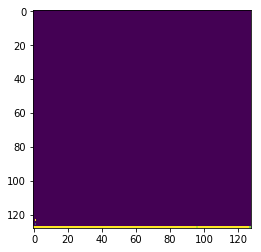

In [25]:
plt.imshow(model.predict(x_train[1:1])[0, :, :, 0])

In [24]:
model.predict(x_train[:1]).shape

(1, 128, 128, 1)